# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel("E:/Python/Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.

In [5]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


As we can see, the quatity has a min of -80995 which shows that the dataset also has information about the products that were returned. Same with UnitPrice.

The information shows that the CustomerID column has missing values and this column can be be an important one to group customers.

# Data Pre-processing

# InvoiceDate

In [8]:
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

Lets seperate Time and Date

In [9]:
df['new_date'] = [d.date() for d in df['InvoiceDate']]
df['new_time'] = [d.time() for d in df['InvoiceDate']]

In [10]:
df.drop('InvoiceDate', axis = 1, inplace=True)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_date,new_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


# InvoiceNo

Since the InvoiceNo is object, we will investigate it.

In [12]:
df['CancelledOrder'] = df['InvoiceNo'].apply(lambda x: re.findall(r'[A-Z]', str(x))).apply(lambda x : pd.Series(x))
df['Invoice_No'] = df['InvoiceNo'].apply(lambda x: re.findall(r'\d+', str(x))).apply(lambda x: pd.Series(x))

In [13]:
df.drop('InvoiceNo', axis=1, inplace=True)

In [14]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_date,new_time,CancelledOrder,Invoice_No
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365


In [15]:
df['CancelledOrder'].unique()

array([nan, 'C', 'A'], dtype=object)

The InvoiceNo had a 'C' denoting cancelled transactions and 'A' denoting bad debts

In [16]:
df[df['CancelledOrder']=='A'].head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_date,new_time,CancelledOrder,Invoice_No
299982,B,Adjust bad debt,1,11062.06,NaN,United Kingdom,2011-08-12,14:50:00,A,563185
299983,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom,2011-08-12,14:51:00,A,563186
299984,B,Adjust bad debt,1,-11062.06,NaN,United Kingdom,2011-08-12,14:52:00,A,563187


Lets drop rows with CancelledOrder 'A' as they serve no information or might bring inaccuracy 

In [17]:
df.drop(df[df['CancelledOrder'] == 'A'].index, inplace=True)

In [18]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_date,new_time,CancelledOrder,Invoice_No
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365


In [19]:
df['CancelledOrder'].unique()

array([nan, 'C'], dtype=object)

Will not delete 'C' because their values will be aggregated and will offset each other

# StockCode

Lets make Stockcode categorical

In [20]:
df['StockCode'] = df['StockCode'].astype('category')

# CustomerID

In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541906.000000,541906.000000,406829.000000
mean,9.552297,4.631552,15287.690570
std,218.081761,93.192775,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df['CustomerID'].isnull().sum()

135077

In [23]:
135077 * 100 / 541905

24.92632472481339

Approx 25% of values are missing. Lets drop them

In [24]:
df[df['CustomerID'].isnull()]

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_date,new_time,CancelledOrder,Invoice_No
622,22139,NaN,56,0.00,NaN,United Kingdom,2010-12-01,11:52:00,NaN,536414
1443,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1444,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1445,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1446,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1447,21790,VINTAGE SNAP CARDS,9,1.66,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1448,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2.51,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1449,21801,CHRISTMAS TREE DECORATION WITH BELL,10,0.43,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1450,21802,CHRISTMAS TREE HEART DECORATION,9,0.43,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544
1451,21803,CHRISTMAS TREE STAR DECORATION,11,0.43,NaN,United Kingdom,2010-12-01,14:32:00,NaN,536544


In [25]:
df.drop(df[df['CustomerID'].isnull()].index, inplace=True)

# UnitPrice

UnitPrice is price per product. So to calculate how much a customer spent, we will have to make a new column

In [26]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [27]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,new_date,new_time,CancelledOrder,Invoice_No,TotalSum
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365,15.30
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365,20.34


# Creating RFM table

In [28]:
import datetime 

In [29]:
end = df['new_date'].max()

Create a day to take as a reference to calculate the recency of a customer 

In [30]:
day_ = end + datetime.timedelta(days=1)

Create RFM

In [31]:
df_rfm = df.groupby(['CustomerID']).agg({
    'new_date': lambda x: (day_ - x.max()).days,
    'Invoice_No': 'count',
    'TotalSum': 'sum'})

In [32]:
df_rfm.head()

,new_date,Invoice_No,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [33]:
df_rfm.rename(columns={'new_date': 'Recency',
                       'Invoice_No': 'Frequency',
                       'TotalSum': 'MonetaryValue'}, inplace=True)

In [34]:
df_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


Distributions of all 3 variables shows high skewness

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


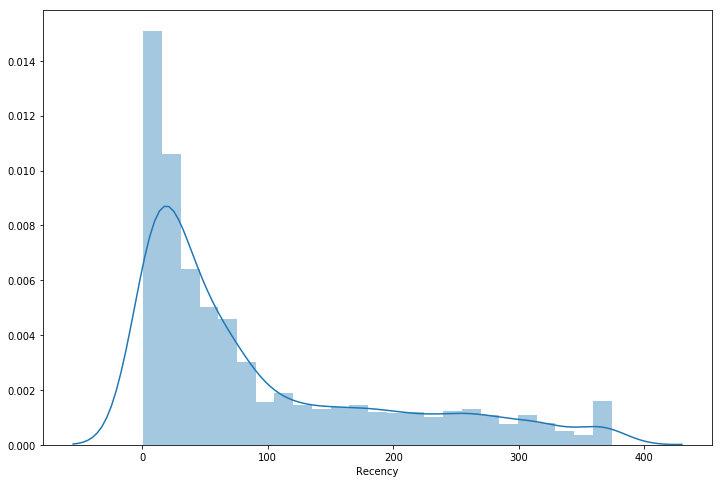

In [35]:
plt.subplots(figsize = (12,8))
sns.distplot(df_rfm['Recency'])

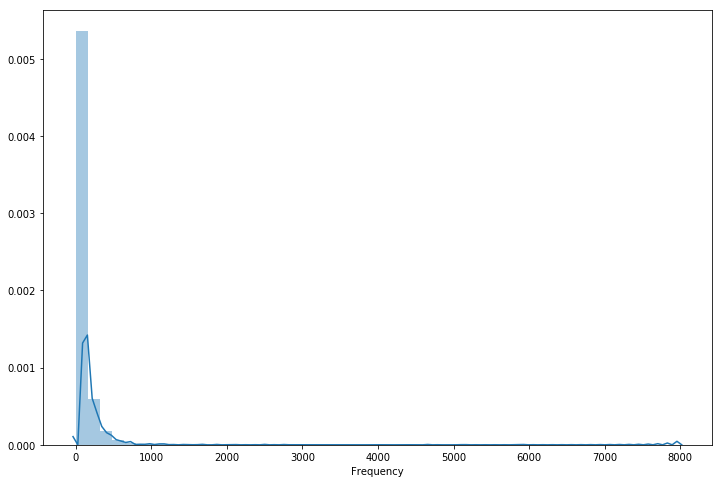

In [36]:
plt.subplots(figsize = (12,8))
sns.distplot(df_rfm['Frequency'])

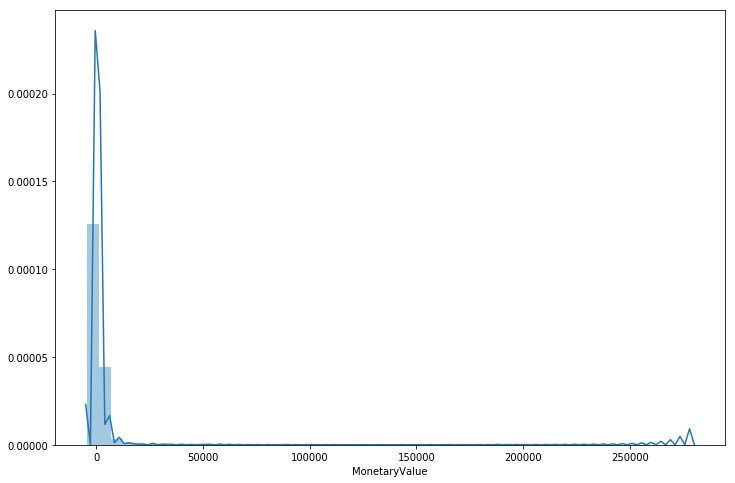

In [37]:
plt.subplots(figsize = (12,8))
sns.distplot(df_rfm['MonetaryValue'])

In [38]:
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.581199,93.053294,1898.459701
std,100.772139,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,51.000000,42.000000,648.075000
75%,144.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


The monetary value cannot be negative, so we rescale it

In [39]:
df_rfm['MonetaryValue'] = (df_rfm['MonetaryValue'] - df_rfm['MonetaryValue'].min()) + 1

In [40]:
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.581199,93.053294,6187.089701
std,100.772139,232.471608,8219.345141
min,1.000000,1.000000,1.000000
25%,17.000000,17.000000,4581.992500
50%,51.000000,42.000000,4936.705000
75%,144.000000,102.000000,5900.355000
max,374.000000,7983.000000,283777.650000


Performing log transformation to reduce skewness

In [41]:
df_new = np.log(df_rfm)

In [42]:
df_new.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,3.768072,3.684042,8.616538
std,1.412969,1.341198,0.363968
min,0.000000,0.000000,0.000000
25%,2.833213,2.833213,8.429889
50%,3.931826,3.737670,8.504453
75%,4.969813,4.624973,8.682768
max,5.924256,8.985070,12.555946


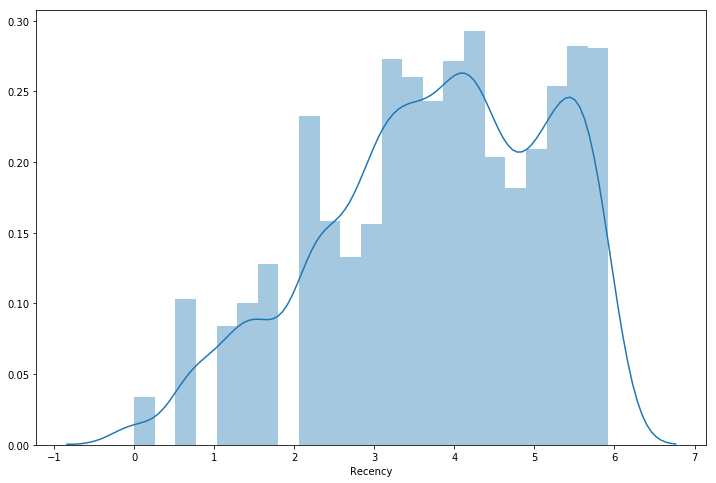

In [43]:
plt.subplots(figsize = (12,8))
sns.distplot(df_new['Recency'])

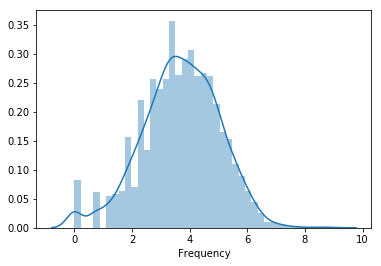

In [44]:
sns.distplot(df_new['Frequency'])

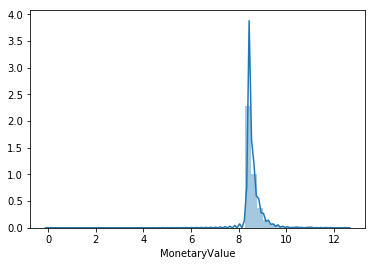

In [45]:
sns.distplot(df_new['MonetaryValue'])

# Standardizing the data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar = StandardScaler()

df_new1 = scalar.fit_transform(df_new)
df_new1 = pd.DataFrame(df_new)
df_new1.index = df_new.index
df_new1.columns = df_new.columns
df_new = df_new1.copy()

In [48]:
df_new.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,3.768072,3.684042,8.616538
std,1.412969,1.341198,0.363968
min,0.000000,0.000000,0.000000
25%,2.833213,2.833213,8.429889
50%,3.931826,3.737670,8.504453
75%,4.969813,4.624973,8.682768
max,5.924256,8.985070,12.555946


# K-Means Clustering

In [49]:
from sklearn.cluster import KMeans

In [50]:
def find_kmeans(data_, start=2, end=11):
    
    n_cl = []
    inertia = []
    
    for n_cluster in range(start, end):
        kmeans = KMeans(n_clusters=n_cluster)
        labels = kmeans.fit(data_)
        
        iner = kmeans.inertia_
        inertia.append(iner)
        n_cl.append(n_cluster)
        
        if n_cluster == start:
            print("No. of Clusters: {}, Inertia: {}, Change in Inertia: {}".format(n_cluster,iner,0.0))
        else:
            print("No. of Clusters: {}, Inertia: {}, Change in Inertia: {}".format(n_cluster,iner, round(inertia[n_cluster - start] - inertia[n_cluster - start - 1],3)))
        
        if n_cluster == end - 1:
            plt.figure(figsize=(12,8))
            plt.title("Elbow Method")
            sns.pointplot(x=n_cl,y=inertia)
    

No. of Clusters: 2, Inertia: 8751.193172940295, Change in Inertia: 0.0
No. of Clusters: 3, Inertia: 6571.12828391375, Change in Inertia: -2180.065
No. of Clusters: 4, Inertia: 5258.695118253338, Change in Inertia: -1312.433
No. of Clusters: 5, Inertia: 4243.723717399092, Change in Inertia: -1014.971
No. of Clusters: 6, Inertia: 3663.696841777779, Change in Inertia: -580.027
No. of Clusters: 7, Inertia: 3207.3288580766075, Change in Inertia: -456.368
No. of Clusters: 8, Inertia: 2848.881298847615, Change in Inertia: -358.448
No. of Clusters: 9, Inertia: 2604.562107699204, Change in Inertia: -244.319
No. of Clusters: 10, Inertia: 2351.9771341161886, Change in Inertia: -252.585
None


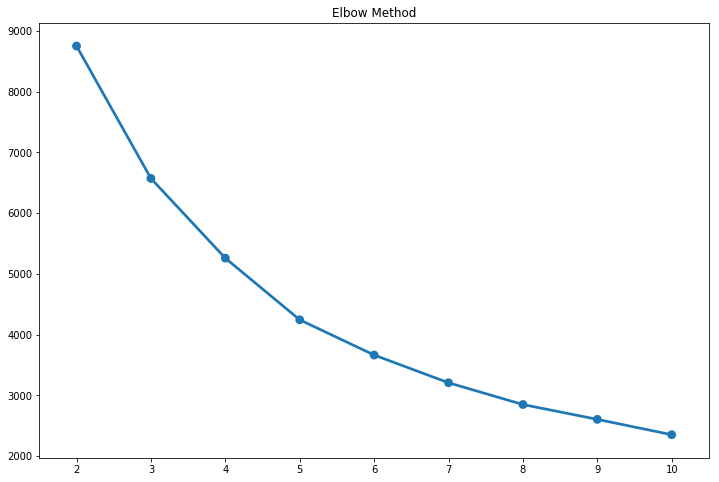

In [51]:
print(find_kmeans(data_= df_new))

# Visualizing Clusters

In [52]:
from sklearn.manifold import TSNE

In [53]:
def kmeans(df, n_clusters):
    
    kmeans = KMeans(n_clusters = n_clusters, random_state = 101)
    kmeans.fit(df)

    cluster_labels = kmeans.labels_
        
    df_clu = df.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=101)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.subplots(figsize=(12,8))
    plt.title('Flattened Graph of {} Clusters'.format(n_clusters))
    plt.scatter(x=transformed[:,0], y=transformed[:,1], c = cluster_labels)
    
    return cluster_labels

array([4, 0, 1, ..., 3, 0, 2])

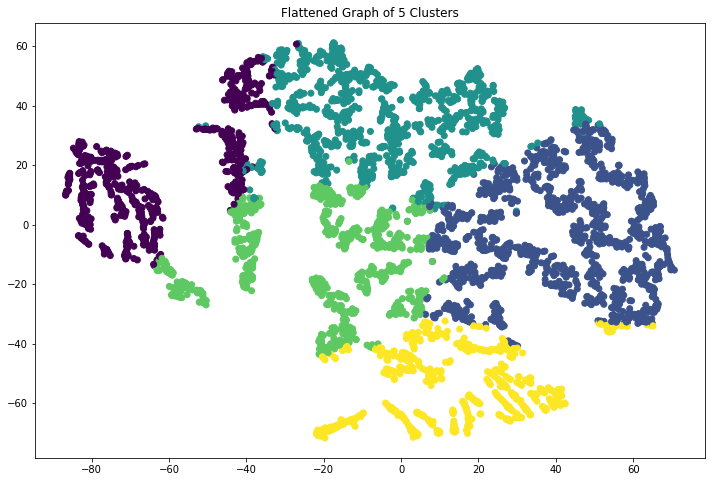

In [54]:
kmeans(df_new, 5)

array([1, 2, 5, ..., 4, 2, 0])

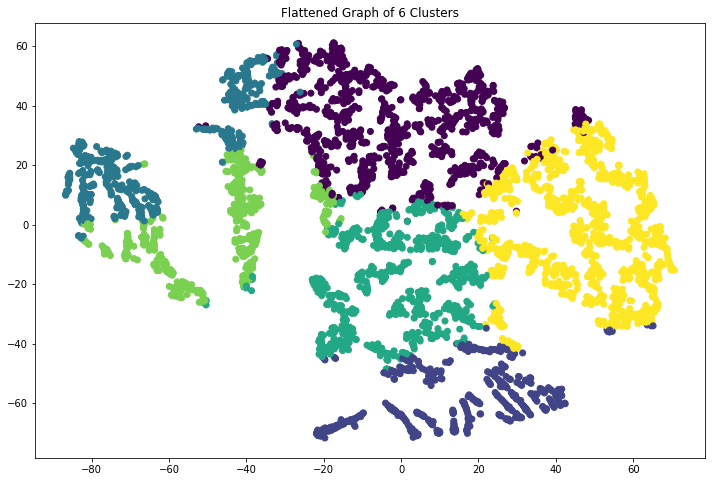

In [55]:
kmeans(df_new, 6)

The drop in inertia of clusters is fast until no. of clusters 6. Then after the change slows down showing that adding more number of clusters won't have any effect further.
Therefore, we choose 6 as the number of clusters